# Exploratory Data Analysis

## Import necessary Libraries

In [1]:
#pip (preferred installer program)
#!pip install pandas_profiling
#!pip install sweetviz

In [2]:
import pandas as pd
import numpy as np
#import pandas_profiling as pp
#import sweetviz as sv

## Import Data

In [3]:
data=pd.read_csv("data_clean.csv")

In [4]:
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


### Removing unnessesary column

In [5]:
data=data.iloc[:,1:]

In [6]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


### Initial Analysis

In [7]:
data.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [8]:
#Data Structure 
print(type(data))
data.shape

<class 'pandas.core.frame.DataFrame'>


(158, 9)

In [9]:
#data types
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

# Data type conversion

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


**Points to Remember**

1. If the dataset is small, and only 3-5% data is missing from a specific numerical column, then it will be ideal to replace the missing values with either mean or median
  - Mean: If the data is normally distributed
  - Median: If the data is skewed

2. If more than 60-70% is missing, then it will be ideal to drop the column, because imputing so much data is neither possible, nor appropriate. 

3. If data is missing upto 5% to 40%, then used advanced techniques.
Either use linear regression, decision trees, or discretization

In [11]:
#Ozone missing data percentage
(38/158)*100

24.050632911392405

In [12]:
#Solar.R missing data percentage
(7/158)*100

4.430379746835443

In [13]:
data['Solar.R'].skew()

-0.41672688426425836

In [14]:
data.groupby('Weather')['Temp'].mean()

Weather
C     77.734694
PS    76.872340
S     78.067797
Name: Temp, dtype: float64

In [15]:
data['Weather'].value_counts()

S     59
C     49
PS    47
Name: Weather, dtype: int64

In [16]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data_orig=data.copy()
data_orig.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


# Data Conversion

In [17]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data['Weather']=data['Weather'].astype('category')           #data['Wind']=data['Wind'].astype('int64')

In [18]:
Dat_Info=data.info()
Dat_Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


In [19]:
print('The % of missing values in Ozone is', (38/158)*100)
print('The % of missing values in Solar.R is', (7/158)*100)
print('The % of missing values in Temp C is', (1/158)*100)
print('The % of missing values in Month is', (1/158)*100)
print('The % of missing values in Weather is', (3/158)*100)

The % of missing values in Ozone is 24.050632911392405
The % of missing values in Solar.R is 4.430379746835443
The % of missing values in Temp C is 0.6329113924050633
The % of missing values in Month is 0.6329113924050633
The % of missing values in Weather is 1.89873417721519


# Duplicates

In [20]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Length: 158, dtype: bool

In [21]:
#Print the duplicated rows
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [22]:
data[data['Solar.R']==191]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
46,21.0,191.0,14.9,77.0,6.0,16,2010,77,PS
150,14.0,191.0,14.3,75.0,9.0,28,2010,75,S
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [23]:
#Count of duplicated rows
data[data.duplicated()].shape

(1, 9)

In [24]:
data_cleaned=data.drop_duplicates()

In [25]:
data_cleaned.shape

(157, 9)

In [26]:
data_cleaned[data_cleaned.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather


# Drop columns

In [27]:
data_cleaned[['Temp C','Temp']].head(60)

,Temp C,Temp
0,67.0,67
1,72.0,72
2,74.0,74
3,62.0,62
4,56.0,56
5,66.0,66
6,65.0,65
7,59.0,59
8,61.0,61
9,69.0,69


In [28]:
data_cleaned[data_cleaned['Temp C']!=data_cleaned['Temp']]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
10,7.0,NaN,6.9,NaN,5.0,11,2010,74,C


In [29]:
data_cleaned=data_cleaned.drop('Temp C',axis=1)

In [30]:
data_cleaned

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


# Rename the columns

In [31]:
#rename the Solar column
data_cleaned = data_cleaned.rename({'Solar.R': 'Solar'}, axis=1)

In [32]:
data_cleaned

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


# Outlier Detection

In [33]:
import matplotlib.pyplot
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

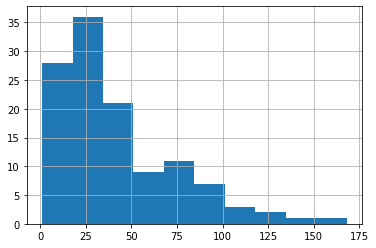

In [34]:
# histogram of Ozone
data_cleaned['Ozone'].hist()

(array([28., 36., 21.,  9., 11.,  7.,  3.,  2.,  1.,  1.]),
 array([  1. ,  17.7,  34.4,  51.1,  67.8,  84.5, 101.2, 117.9, 134.6,
        151.3, 168. ]),
 <BarContainer object of 10 artists>)

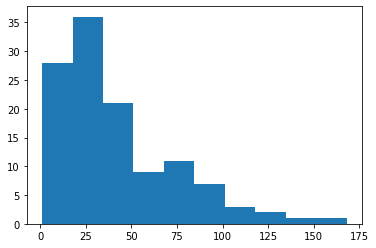

In [35]:
import matplotlib.pyplot as plt
plt.hist(data_cleaned['Ozone'])

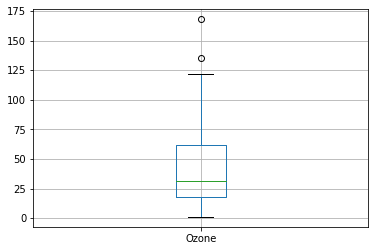

In [36]:
#Box plot
data_cleaned.boxplot(column=['Ozone'])
plt.show()

In [37]:
#Descriptive stat
data_cleaned['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [38]:
#Interquartile Range
print('Interquartile Range',62-18)

#Upper Limit of Ozone
print('Upper Limit',62+1.5*(62-18))

#Lower Limit of Ozone
print('Lower Limit',18-1.5*(62-18))

Interquartile Range 44
Upper Limit 128.0
Lower Limit -48.0


In [39]:
data_cleaned

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [40]:
data['Weather'].value_counts()

S     59
C     49
PS    47
Name: Weather, dtype: int64

<AxesSubplot:>

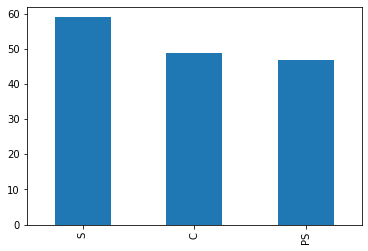

In [41]:
#Bar plot
data['Weather'].value_counts().plot.bar()

# Missing Values and Imputation

In [42]:
import seaborn as sns
cols = data_cleaned.columns 
cols

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

help(sns.color_palette)

<AxesSubplot:>

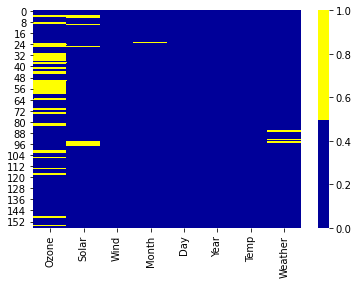

In [43]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned[cols].isnull(),
            cmap=sns.color_palette(colours))

In [44]:
data_cleaned.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4       True
       ...  
152    False
153    False
154    False
155     True
157    False
Length: 157, dtype: bool

In [45]:
#data_cleaned[data_cleaned.isnull().any(axis=1)].head()
data_cleaned[data_cleaned.isnull().any(axis=1)]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,NaN,NaN,14.3,5.0,5,2010,56,S
5,28.0,NaN,14.9,5.0,6,2010,66,C
9,NaN,194.0,8.6,5.0,10,2010,69,S
10,7.0,NaN,6.9,5.0,11,2010,74,C
23,32.0,92.0,12.0,NaN,24,2010,61,C
24,NaN,66.0,16.6,5.0,25,2010,57,PS
25,NaN,266.0,14.9,5.0,26,2010,58,C
26,NaN,NaN,8.0,5.0,27,2010,57,PS
31,NaN,286.0,8.6,6.0,1,2010,78,S
32,NaN,287.0,9.7,6.0,2,2010,74,C


In [46]:
data_cleaned.shape

(157, 8)

In [47]:
data_cleaned.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [48]:
#Percentage of data missing in Ozone
(38/157)*100

24.203821656050955

In [49]:
#Percentage of data missing in Solar
(7/157)*100

4.45859872611465

- Since only about 4.45% data is missing in 'Solar', we can replace the missing value with mean/median depending upon skewness in the data.
- If data is skewed, then replace with median
- If data is normally dstributed, then replace with mean

**Points to Remember**

Also if more than 5% data is missing, then it is NOT ideal to replace with a single value,
we should look for similar cases in the data to impute the missing values.

Suppose we consider 'Solar' column to be helpful in determining the missing values in Ozone, we must bin the Ozone data, and find the mean value of solar grouped by these bins.

But 'Solar' column also has some missing data, so we need to impute those first if we want to use the 'Solar' column to impute missing values in 'Ozone' column.

-0.4141167126969295


C:\Users\santh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Solar'>

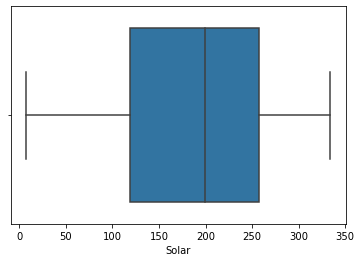

In [50]:
print(data_cleaned['Solar'].skew())
sns.boxplot(data_cleaned['Solar'])

In [51]:
solar_median=data_cleaned['Solar'].median()
print(solar_median)
solar_mean=data_cleaned['Solar'].mean()
print(solar_mean)

199.0
185.36666666666667


In [52]:
data_cleaned['Solar'] = data_cleaned['Solar'].fillna(solar_mean)
data_cleaned['Solar']

0      190.000000
1      118.000000
2      149.000000
3      313.000000
4      185.366667
          ...    
152    223.000000
153    190.000000
154    193.000000
155    145.000000
157    131.000000
Name: Solar, Length: 157, dtype: float64

In [53]:
data_cleaned['Solar'].isnull().sum()

0

In [54]:
data_cleaned[data_cleaned['Solar'].isnull()]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather


In [55]:
#Mean Imputation
mean = data_cleaned['Ozone'].mean()
print(mean)

41.81512605042017


In [56]:
data_cleaned

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5.0,1,2010,67,S
1,36.0,118.000000,8.0,5.0,2,2010,72,C
2,12.0,149.000000,12.6,5.0,3,2010,74,PS
3,18.0,313.000000,11.5,5.0,4,2010,62,S
4,NaN,185.366667,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.000000,11.5,9.0,30,2010,68,S
153,41.0,190.000000,7.4,5.0,1,2010,67,C
154,30.0,193.000000,6.9,9.0,26,2010,70,PS
155,NaN,145.000000,13.2,9.0,27,2010,77,S


In [57]:
data_cleaned.describe()

,Ozone,Solar,Wind,Month,Day,Year,Temp
count,119.000000,157.000000,157.000000,156.000000,157.000000,157.0,157.000000
mean,41.815126,185.366667,9.929936,7.032051,15.929936,2010.0,77.745223
std,32.659249,86.998999,3.505188,1.429730,8.974404,0.0,9.405334
min,1.000000,7.000000,1.700000,5.000000,1.000000,2010.0,56.000000
25%,18.000000,127.000000,7.400000,6.000000,8.000000,2010.0,72.000000
50%,31.000000,193.000000,9.700000,7.000000,16.000000,2010.0,79.000000
75%,62.000000,255.000000,11.500000,8.000000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,2010.0,97.000000


In [58]:
#data_cleaned['Ozone'] = data_cleaned['Ozone'].fillna(mean)

In [59]:
data_cleaned['Solar'].unique()

array([190.        , 118.        , 149.        , 313.        ,
       185.36666667, 299.        ,  99.        ,  19.        ,
       194.        , 256.        , 290.        , 274.        ,
        65.        , 334.        , 307.        ,  78.        ,
       322.        ,  44.        ,   8.        , 320.        ,
        25.        ,  92.        ,  66.        , 266.        ,
        13.        , 252.        , 223.        , 279.        ,
       286.        , 287.        , 242.        , 186.        ,
       220.        , 264.        , 127.        , 273.        ,
       291.        , 323.        , 259.        , 250.        ,
       148.        , 332.        , 191.        , 284.        ,
        37.        , 120.        , 137.        , 150.        ,
        59.        ,  91.        , 135.        ,  47.        ,
        98.        ,  31.        , 138.        , 269.        ,
       248.        , 236.        , 101.        , 175.        ,
       314.        , 276.        , 267.        , 272.  

In [60]:
data_cleaned['Solar_Bin']=pd.cut(x=data_cleaned['Solar'],bins=[0,50,100,150,200,250,300,350], right=True,
                                 labels=['a','b','c','d','e','f','g'])
data_cleaned

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Solar_Bin
0,41.0,190.000000,7.4,5.0,1,2010,67,S,d
1,36.0,118.000000,8.0,5.0,2,2010,72,C,c
2,12.0,149.000000,12.6,5.0,3,2010,74,PS,c
3,18.0,313.000000,11.5,5.0,4,2010,62,S,g
4,NaN,185.366667,14.3,5.0,5,2010,56,S,d
...,...,...,...,...,...,...,...,...,...
152,20.0,223.000000,11.5,9.0,30,2010,68,S,e
153,41.0,190.000000,7.4,5.0,1,2010,67,C,d
154,30.0,193.000000,6.9,9.0,26,2010,70,PS,d
155,NaN,145.000000,13.2,9.0,27,2010,77,S,c


In [61]:
Ozone_Bins=pd.DataFrame(data_cleaned['Ozone'].groupby(data_cleaned['Solar_Bin']).mean())
Ozone_Bins

,Ozone
Solar_Bin,
a,11.600000
b,30.166667
c,21.181818
d,53.130435
e,59.840000
f,50.115385
g,26.571429


In [62]:
if (data_cleaned['Ozone'].isnull()) & (data_cleaned['Solar'] < 50):
    data_cleaned['Ozone'].fillna(30.166667)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [63]:
data_cleaned.dtypes

Ozone         float64
Solar         float64
Wind          float64
Month         float64
Day             int64
Year            int64
Temp            int64
Weather      category
Solar_Bin    category
dtype: object

In [64]:
#Missing value imputation for categorical vlaue
#Get the object columns
obj_columns=data_cleaned[['Weather']]

In [65]:
obj_columns

,Weather
0,S
1,C
2,PS
3,S
4,S
...,...
152,S
153,C
154,PS
155,S


In [66]:
obj_columns.rename(columns={'Weather':'Weather1'},inplace=True)
obj_columns

C:\Users\santh\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Weather1
0,S
1,C
2,PS
3,S
4,S
...,...
152,S
153,C
154,PS
155,S


In [67]:
data_cleaned['Weather'].dtype

CategoricalDtype(categories=['C', 'PS', 'S'], ordered=False)

In [68]:
obj_columns.isnull().sum()

Weather1    3
dtype: int64

In [69]:
obj_columns.mode().iloc[0]

Weather1    S
Name: 0, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [70]:
data_cleaned['Weather'].value_counts()

S     58
C     49
PS    47
Name: Weather, dtype: int64

In [71]:
#Missing value imputation for categorical vlaue
obj_columns=obj_columns.fillna(obj_columns.mode().iloc[0])

In [72]:
obj_columns.isnull().sum()

Weather1    0
dtype: int64

In [73]:
data_cleaned.shape

(157, 9)

In [74]:
obj_columns.shape

(157, 1)

In [75]:
data_cleaned

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Solar_Bin
0,41.0,190.000000,7.4,5.0,1,2010,67,S,d
1,36.0,118.000000,8.0,5.0,2,2010,72,C,c
2,12.0,149.000000,12.6,5.0,3,2010,74,PS,c
3,18.0,313.000000,11.5,5.0,4,2010,62,S,g
4,NaN,185.366667,14.3,5.0,5,2010,56,S,d
...,...,...,...,...,...,...,...,...,...
152,20.0,223.000000,11.5,9.0,30,2010,68,S,e
153,41.0,190.000000,7.4,5.0,1,2010,67,C,d
154,30.0,193.000000,6.9,9.0,26,2010,70,PS,d
155,NaN,145.000000,13.2,9.0,27,2010,77,S,c


In [77]:
#'data_cleaned3' has the variable 'Weather'. After applying concat, it will also have 'Weather' without missing values
#Join the data set with imputed object dataset
#data_cleaned=pd.concat([data_cleaned,obj_columns],axis=1)

In [78]:
data_cleaned.isnull().sum()

Ozone        38
Solar         0
Wind          0
Month         1
Day           0
Year          0
Temp          0
Weather       3
Solar_Bin     0
dtype: int64

In [79]:
data_cleaned['Weather'].mode()

0    S
Name: Weather, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [80]:
data_cleaned['Weather']=data_cleaned['Weather'].fillna(data_cleaned['Weather'].mode().iloc[0])
data_cleaned['Weather'].isnull().sum()

0

In [81]:
data_cleaned['Weather']=data_cleaned['Weather'].fillna('S')

In [82]:
data_cleaned

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Solar_Bin
0,41.0,190.000000,7.4,5.0,1,2010,67,S,d
1,36.0,118.000000,8.0,5.0,2,2010,72,C,c
2,12.0,149.000000,12.6,5.0,3,2010,74,PS,c
3,18.0,313.000000,11.5,5.0,4,2010,62,S,g
4,NaN,185.366667,14.3,5.0,5,2010,56,S,d
...,...,...,...,...,...,...,...,...,...
152,20.0,223.000000,11.5,9.0,30,2010,68,S,e
153,41.0,190.000000,7.4,5.0,1,2010,67,C,d
154,30.0,193.000000,6.9,9.0,26,2010,70,PS,d
155,NaN,145.000000,13.2,9.0,27,2010,77,S,c


In [83]:
data_cleaned.isnull().sum()

Ozone        38
Solar         0
Wind          0
Month         1
Day           0
Year          0
Temp          0
Weather       0
Solar_Bin     0
dtype: int64

In [85]:
data_cleaned['Ozone'] = data_cleaned['Ozone'].fillna(mean)

In [86]:
data_cleaned.isnull().sum()

Ozone        0
Solar        0
Wind         0
Month        1
Day          0
Year         0
Temp         0
Weather      0
Solar_Bin    0
dtype: int64

In [87]:
data_cleaned.dtypes

Ozone         float64
Solar         float64
Wind          float64
Month         float64
Day             int64
Year            int64
Temp            int64
Weather      category
Solar_Bin    category
dtype: object

In [88]:
#data_cleaned['Solar'] = data_cleaned['Solar'].fillna(mean)
#data_cleaned['Month'] = data_cleaned['Month'].fillna(mean)

In [89]:
data_cleaned.groupby('Month')['Temp'].mean()

Month
5.0    65.741935
6.0    79.100000
7.0    83.903226
8.0    83.967742
9.0    76.666667
Name: Temp, dtype: float64

In [90]:
data_cleaned

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Solar_Bin
0,41.000000,190.000000,7.4,5.0,1,2010,67,S,d
1,36.000000,118.000000,8.0,5.0,2,2010,72,C,c
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS,c
3,18.000000,313.000000,11.5,5.0,4,2010,62,S,g
4,41.815126,185.366667,14.3,5.0,5,2010,56,S,d
...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S,e
153,41.000000,190.000000,7.4,5.0,1,2010,67,C,d
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS,d
155,41.815126,145.000000,13.2,9.0,27,2010,77,S,c


In [91]:
data_cleaned1=data_cleaned.copy()
data_cleaned1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Solar_Bin
0,41.000000,190.000000,7.4,5.0,1,2010,67,S,d
1,36.000000,118.000000,8.0,5.0,2,2010,72,C,c
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS,c
3,18.000000,313.000000,11.5,5.0,4,2010,62,S,g
4,41.815126,185.366667,14.3,5.0,5,2010,56,S,d
...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S,e
153,41.000000,190.000000,7.4,5.0,1,2010,67,C,d
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS,d
155,41.815126,145.000000,13.2,9.0,27,2010,77,S,c


In [92]:
#data[data["month"=="May"]]=5
#data_cleaned1=data_cleaned['Month'].replace("May",5)

In [93]:
data_cleaned1['Month']=pd.to_numeric(data_cleaned1['Month'],errors='coerce')
Month=data_cleaned1['Month'].fillna(5)

In [94]:
Month

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
152    9.0
153    5.0
154    9.0
155    9.0
157    9.0
Name: Month, Length: 157, dtype: float64

In [95]:
data_cleaned1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Solar_Bin
0,41.000000,190.000000,7.4,5.0,1,2010,67,S,d
1,36.000000,118.000000,8.0,5.0,2,2010,72,C,c
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS,c
3,18.000000,313.000000,11.5,5.0,4,2010,62,S,g
4,41.815126,185.366667,14.3,5.0,5,2010,56,S,d
...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S,e
153,41.000000,190.000000,7.4,5.0,1,2010,67,C,d
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS,d
155,41.815126,145.000000,13.2,9.0,27,2010,77,S,c


In [96]:
type(Month)

pandas.core.series.Series

In [97]:
data_cleaned1['Month']=Month
data_cleaned1.dtypes

Ozone         float64
Solar         float64
Wind          float64
Month         float64
Day             int64
Year            int64
Temp            int64
Weather      category
Solar_Bin    category
dtype: object

In [98]:
data_cleaned1.isnull().sum()

Ozone        0
Solar        0
Wind         0
Month        0
Day          0
Year         0
Temp         0
Weather      0
Solar_Bin    0
dtype: int64

In [99]:
data_cleaned1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Solar_Bin
0,41.000000,190.000000,7.4,5.0,1,2010,67,S,d
1,36.000000,118.000000,8.0,5.0,2,2010,72,C,c
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS,c
3,18.000000,313.000000,11.5,5.0,4,2010,62,S,g
4,41.815126,185.366667,14.3,5.0,5,2010,56,S,d
...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S,e
153,41.000000,190.000000,7.4,5.0,1,2010,67,C,d
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS,d
155,41.815126,145.000000,13.2,9.0,27,2010,77,S,c


# Scatter plot and Correlation analysis

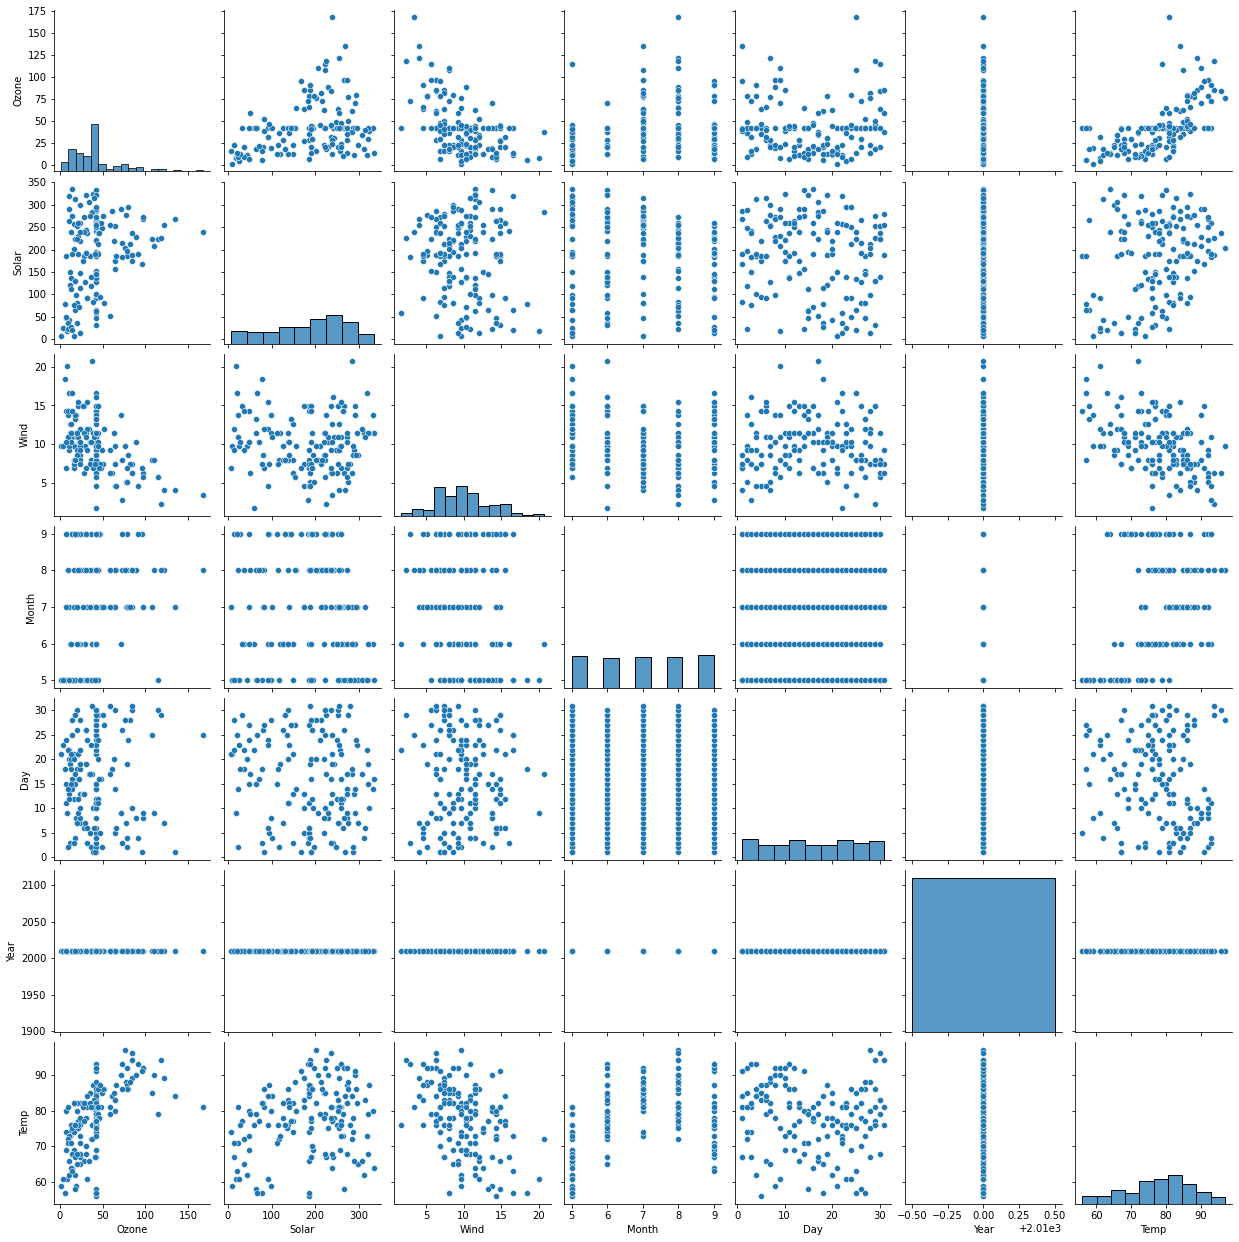

In [100]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned1)

In [101]:
#Correlation
data_cleaned.corr()

#Correlation is always between -1 to +1
#-1 to -0.5 & +0.5 to +1 is strong correlationship
#-0.5 to 0 & 0 to 0.5 is moderate correlationship
#Values very close to 0 indicate no correlationship

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.304559,-0.520004,0.132860,-0.021916,NaN,0.606500
Solar,0.304559,1.000000,-0.055874,-0.090902,-0.151007,NaN,0.260677
Wind,-0.520004,-0.055874,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.132860,-0.090902,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.021916,-0.151007,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.260677,-0.441228,0.398516,-0.122787,NaN,1.000000


# Transformations

#### Dummy Variable

In [102]:
#Creating dummy variable for Weather column
data_cleaned1=pd.get_dummies(data_cleaned1,columns=['Weather'])

In [103]:
data_cleaned1
#data_cleaned=data_cleaned.drop(['Weather'],axis=1)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Solar_Bin,Weather_C,Weather_PS,Weather_S
0,41.000000,190.000000,7.4,5.0,1,2010,67,d,0,0,1
1,36.000000,118.000000,8.0,5.0,2,2010,72,c,1,0,0
2,12.000000,149.000000,12.6,5.0,3,2010,74,c,0,1,0
3,18.000000,313.000000,11.5,5.0,4,2010,62,g,0,0,1
4,41.815126,185.366667,14.3,5.0,5,2010,56,d,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,e,0,0,1
153,41.000000,190.000000,7.4,5.0,1,2010,67,d,1,0,0
154,30.000000,193.000000,6.9,9.0,26,2010,70,d,0,1,0
155,41.815126,145.000000,13.2,9.0,27,2010,77,c,0,0,1


In [104]:
#We will drop 'Solar_Bin' column as it was created only for missing value imputation
data_cleaned1=data_cleaned1.drop('Solar_Bin',axis=1)
data_cleaned1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.000000,7.4,5.0,1,2010,67,0,0,1
1,36.000000,118.000000,8.0,5.0,2,2010,72,1,0,0
2,12.000000,149.000000,12.6,5.0,3,2010,74,0,1,0
3,18.000000,313.000000,11.5,5.0,4,2010,62,0,0,1
4,41.815126,185.366667,14.3,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,0,0,1
153,41.000000,190.000000,7.4,5.0,1,2010,67,1,0,0
154,30.000000,193.000000,6.9,9.0,26,2010,70,0,1,0
155,41.815126,145.000000,13.2,9.0,27,2010,77,0,0,1


In [105]:
#We will drop the 'Year' column as it has only one value throughout
data_cleaned1=data_cleaned1.drop('Year',axis=1)
data_cleaned1

,Ozone,Solar,Wind,Month,Day,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.000000,7.4,5.0,1,67,0,0,1
1,36.000000,118.000000,8.0,5.0,2,72,1,0,0
2,12.000000,149.000000,12.6,5.0,3,74,0,1,0
3,18.000000,313.000000,11.5,5.0,4,62,0,0,1
4,41.815126,185.366667,14.3,5.0,5,56,0,0,1
...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,68,0,0,1
153,41.000000,190.000000,7.4,5.0,1,67,1,0,0
154,30.000000,193.000000,6.9,9.0,26,70,0,1,0
155,41.815126,145.000000,13.2,9.0,27,77,0,0,1


#### Normalization of the data

In [106]:
data_cleaned1

,Ozone,Solar,Wind,Month,Day,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.000000,7.4,5.0,1,67,0,0,1
1,36.000000,118.000000,8.0,5.0,2,72,1,0,0
2,12.000000,149.000000,12.6,5.0,3,74,0,1,0
3,18.000000,313.000000,11.5,5.0,4,62,0,0,1
4,41.815126,185.366667,14.3,5.0,5,56,0,0,1
...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,68,0,0,1
153,41.000000,190.000000,7.4,5.0,1,67,1,0,0
154,30.000000,193.000000,6.9,9.0,26,70,0,1,0
155,41.815126,145.000000,13.2,9.0,27,77,0,0,1


In [107]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [108]:
#MinMax Scalar
#(Data_Value - Minimum Value) / Range of the Data

In [109]:
array1=data_cleaned1.values
array1

array([[ 41.        , 190.        ,   7.4       , ...,   0.        ,
          0.        ,   1.        ],
       [ 36.        , 118.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ],
       [ 12.        , 149.        ,  12.6       , ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [ 30.        , 193.        ,   6.9       , ...,   0.        ,
          1.        ,   0.        ],
       [ 41.81512605, 145.        ,  13.2       , ...,   0.        ,
          0.        ,   1.        ],
       [ 18.        , 131.        ,   8.        , ...,   1.        ,
          0.        ,   0.        ]])

In [110]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array1)

In [111]:
rescaledX

array([[0.23952096, 0.55963303, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.20958084, 0.33944954, 0.33157895, ..., 1.        , 0.        ,
        0.        ],
       [0.06586826, 0.43425076, 0.57368421, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.17365269, 0.56880734, 0.27368421, ..., 0.        , 1.        ,
        0.        ],
       [0.24440195, 0.42201835, 0.60526316, ..., 0.        , 0.        ,
        1.        ],
       [0.10179641, 0.37920489, 0.33157895, ..., 1.        , 0.        ,
        0.        ]])

In [112]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array1[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])
print(rescaledX)

[[0.24 0.56 0.3  0.   0.  ]
 [0.21 0.34 0.33 0.   0.03]
 [0.07 0.43 0.57 0.   0.07]
 [0.1  0.94 0.52 0.   0.1 ]
 [0.24 0.55 0.66 0.   0.13]]
[[0.24 0.56 0.3  0.   0.  ]
 [0.21 0.34 0.33 0.   0.03]
 [0.07 0.43 0.57 0.   0.07]
 [0.1  0.94 0.52 0.   0.1 ]
 [0.24 0.55 0.66 0.   0.13]
 [0.16 0.55 0.69 0.   0.17]
 [0.13 0.89 0.36 0.   0.2 ]
 [0.11 0.28 0.64 0.   0.23]
 [0.04 0.04 0.97 0.   0.27]
 [0.24 0.57 0.36 0.   0.3 ]
 [0.04 0.55 0.27 0.   0.33]
 [0.09 0.76 0.42 0.   0.37]
 [0.06 0.87 0.39 0.   0.4 ]
 [0.08 0.82 0.48 0.   0.43]
 [0.1  0.18 0.61 0.   0.47]
 [0.08 1.   0.52 0.   0.5 ]
 [0.2  0.92 0.54 0.   0.53]
 [0.03 0.22 0.88 0.   0.57]
 [0.17 0.96 0.52 0.   0.6 ]
 [0.06 0.11 0.42 0.   0.63]
 [0.   0.   0.42 0.   0.67]
 [0.06 0.96 0.78 0.   0.7 ]
 [0.02 0.06 0.42 0.   0.73]
 [0.19 0.26 0.54 0.   0.77]
 [0.24 0.18 0.78 0.   0.8 ]
 [0.24 0.79 0.69 0.   0.83]
 [0.24 0.55 0.33 0.   0.87]
 [0.13 0.02 0.54 0.   0.9 ]
 [0.26 0.75 0.69 0.   0.93]
 [0.68 0.66 0.21 0.   0.97]
 [0.22 0.83 0.3  0.

In [113]:
data_cleaned

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Solar_Bin
0,41.000000,190.000000,7.4,5.0,1,2010,67,S,d
1,36.000000,118.000000,8.0,5.0,2,2010,72,C,c
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS,c
3,18.000000,313.000000,11.5,5.0,4,2010,62,S,g
4,41.815126,185.366667,14.3,5.0,5,2010,56,S,d
...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S,e
153,41.000000,190.000000,7.4,5.0,1,2010,67,C,d
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS,d
155,41.815126,145.000000,13.2,9.0,27,2010,77,S,c


In [114]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler().fit(array1)
rescaledX = scaler.transform(array1)

# summarize transformed data
#set_printoptions(precision=2)
#print(rescaledX[0:5,:])

In [116]:
rescaledX

array([[-0.03,  0.05, -0.72, ..., -0.67, -0.65,  1.25],
       [-0.21, -0.78, -0.55, ...,  1.48, -0.65, -0.8 ],
       [-1.05, -0.42,  0.76, ..., -0.67,  1.53, -0.8 ],
       ...,
       [-0.42,  0.09, -0.87, ..., -0.67,  1.53, -0.8 ],
       [ 0.  , -0.47,  0.94, ..., -0.67, -0.65,  1.25],
       [-0.84, -0.63, -0.55, ...,  1.48, -0.65, -0.8 ]])

# Speed up the EDA process

In [117]:
!pip install pandas_profiling

In [118]:
import pandas_profiling as pp
EDA_report= pp.ProfileReport(data)
EDA_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [119]:
#To create an HTML format report
EDA_report.to_file(output_file='report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [120]:
import sweetviz as sv
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
